### Cleaning and obtaining building data

First, we are loading data from 'Building_SF.csv' to the DataFrame. The file contains data about buildings in San Francisco and  additional information about green areas, such as parks and gardens. We have choosen for this task pyarrow engine since it is blazingly fast

In [122]:
import geopandas as gpd
import pandas as pd

final = pd.read_csv('Buildings_SF.csv', delimiter=',', header=0, index_col=['element_type', 'osmid'], engine='pyarrow')

In [123]:
final

amenity  \
element_type osmid               
node         140982745           
             140982928           
             320089199           
             358767175           
             358775312           
...                        ...   
relation     13957318            
             13957319            
             13957320            
             13997987            
             14133243            

                                                           building_shape  \
element_type osmid                                                          
node         140982745                    POINT (-122.4324315 37.7376199)   
             140982928                    POINT (-122.3996929 37.7602076)   
             320089199                    POINT (-122.4041926 37.8002141)   
             358767175                     POINT (-122.4908797 37.722374)   
             358775312                    POINT (-122.4033622 37.7330108)   
...                                                                   ...   
relation     13957318   POLYGON ((-122.4050678 37.793924, -122.4050033...   
             13957319   POLYGON ((-122.4059201 37.793473, -122.406093 ...   
             13957320   POLYGON ((-122.406147 37.7937891, -122.4059148...   
             13997987   POLYGON ((-122.425537 37.8014149, -122.4255209...   
             14133243   POLYGON ((-122.4181674 37.7844034, -122.418126...   

                       highway              alt_name    building cooperative  \
element_type osmid                                                             
node         140982745          Glenridge Apartments  apartments         yes   
             140982928                                apartments               
             320089199                                       yes               
             358767175                                                         
             358775312                                                         
...                        ...                   ...         ...         ...   
relation     13957318                                        yes               
             13957319                                        yes               
             13957320                                        yes               
             13997987                                      hotel               
             14133243                                        yes               

                        ele       gnis:Class    gnis:County  gnis:County_num  \
element_type osmid                                                             
node         140982745  153  Populated Place  San Francisco             75.0   
             140982928   42  Populated Place  San Francisco             75.0   
             320089199                                                   NaN   
             358767175   16                                              NaN   
             358775312   24                                              NaN   
...                     ...              ...            ...              ...   
relation     13957318                                                    NaN   
             13957319                                                    NaN   
             13957320                                                    NaN   
             13997987                                                    NaN   
             14133243                                                    NaN   

                        ... min_height  owner  was:wikidata was:wikipedia  \
element_type osmid      ...                                                 
node         140982745  ...        NaN                                      
             140982928  ...        NaN                                      
             320089199  ...        NaN                                      
             358767175  ...        NaN                                      
             358775312  ...       

We drop the data which we reckon as unnecessary, we keep columns such as *building polygons*, *building* and *location*. They'll be in handy to get rid of the unwanted structures as well as distinguish green areas.

In [124]:
final = final.query("element_type in ['way','relation']")
final.reset_index(drop=True, inplace=True)
final = final[['building_shape', 'building', 'location', 'leisure', 'natural', 'landuse']]

In [125]:
final

building_shape building location  \
0       POLYGON ((-122.4431106 37.7704071, -122.443140...                     
1       POLYGON ((-122.433488 37.7900071, -122.4334451...      yes            
2       POLYGON ((-122.4809724 37.7429364, -122.481033...                     
3       POLYGON ((-122.453944 37.7719632, -122.45291 3...                     
4       POLYGON ((-122.4391547 37.7900924, -122.439195...                     
...                                                   ...      ...      ...   
162422  POLYGON ((-122.4050678 37.793924, -122.4050033...      yes            
162423  POLYGON ((-122.4059201 37.793473, -122.406093 ...      yes            
162424  POLYGON ((-122.406147 37.7937891, -122.4059148...      yes            
162425  POLYGON ((-122.425537 37.8014149, -122.4255209...    hotel            
162426  POLYGON ((-122.4181674 37.7844034, -122.418126...      yes            

       leisure natural landuse  
0         park    wood          
1                               
2         park                  
3         park                  
4         park                  
...        ...     ...     ...  
162422                          
162423                          
162424                          
162425                          
162426                          

[162427 rows x 6 columns]

We need to extract the parks and gardens from our database into a new DataFrame.

In [126]:
forest = final.query("natural == 'wood' or leisure in ['garden','park'] or landuse == 'forest'")
final.drop(forest.index, inplace=True)

In [127]:
final

building_shape   building location  \
1       POLYGON ((-122.433488 37.7900071, -122.4334451...        yes            
17      POLYGON ((-122.4031399 37.7953705, -122.403042...        yes            
19      POLYGON ((-122.398586 37.7765704, -122.3980009...        yes            
20      POLYGON ((-122.3685467 37.8186087, -122.367551...  warehouse            
21      POLYGON ((-122.4039206 37.7838474, -122.403824...        yes            
...                                                   ...        ...      ...   
162422  POLYGON ((-122.4050678 37.793924, -122.4050033...        yes            
162423  POLYGON ((-122.4059201 37.793473, -122.406093 ...        yes            
162424  POLYGON ((-122.406147 37.7937891, -122.4059148...        yes            
162425  POLYGON ((-122.425537 37.8014149, -122.4255209...      hotel            
162426  POLYGON ((-122.4181674 37.7844034, -122.418126...        yes            

       leisure natural       landuse  
1                                     
17                                    
19                      construction  
20                                    
21                                    
...        ...     ...           ...  
162422                                
162423                                
162424                                
162425                                
162426                                

[160319 rows x 6 columns]

In [128]:
forest

building_shape building location  \
0       POLYGON ((-122.4431106 37.7704071, -122.443140...                     
2       POLYGON ((-122.4809724 37.7429364, -122.481033...                     
3       POLYGON ((-122.453944 37.7719632, -122.45291 3...                     
4       POLYGON ((-122.4391547 37.7900924, -122.439195...                     
5       POLYGON ((-122.4260233 37.7913098, -122.425953...                     
...                                                   ...      ...      ...   
162414  POLYGON ((-122.4020361 37.784454, -122.4019684...                     
162415  POLYGON ((-122.4021095 37.7844012, -122.402042...                     
162416  POLYGON ((-122.4022165 37.7842036, -122.402313...                     
162418  POLYGON ((-122.410244 37.8005876, -122.4102192...                     
162419  MULTIPOLYGON (((-122.3980254 37.7961591, -122....                     

       leisure natural landuse  
0         park    wood          
2         park                  
3         park                  
4         park                  
5         park                  
...        ...     ...     ...  
162414  garden                  
162415  garden                  
162416  garden                  
162418  garden                  
162419    park                  

[2108 rows x 6 columns]

As mentioned before, we are filtering buildings to remove objects marked as buildings, but are not ones. All floating objects are removed, as well as tents  and construction sites.

In [129]:
final.drop(
    final[final.building.map(lambda x: str(x) in ['houseboat', 'construction', 'tent', 'mobile_home', 'ship'])].index
    , inplace=True)
final.drop(final[final.landuse == 'construction'].index, inplace=True)

In [130]:
final

building_shape   building location  \
1       POLYGON ((-122.433488 37.7900071, -122.4334451...        yes            
17      POLYGON ((-122.4031399 37.7953705, -122.403042...        yes            
20      POLYGON ((-122.3685467 37.8186087, -122.367551...  warehouse            
21      POLYGON ((-122.4039206 37.7838474, -122.403824...        yes            
22      POLYGON ((-122.4040078 37.784463, -122.4040062...     retail            
...                                                   ...        ...      ...   
162422  POLYGON ((-122.4050678 37.793924, -122.4050033...        yes            
162423  POLYGON ((-122.4059201 37.793473, -122.406093 ...        yes            
162424  POLYGON ((-122.406147 37.7937891, -122.4059148...        yes            
162425  POLYGON ((-122.425537 37.8014149, -122.4255209...      hotel            
162426  POLYGON ((-122.4181674 37.7844034, -122.418126...        yes            

       leisure natural landuse  
1                               
17                              
20                              
21                              
22                              
...        ...     ...     ...  
162422                          
162423                          
162424                          
162425                          
162426                          

[160272 rows x 6 columns]

Underground structures should also be dropped since trees can't cast a shadow on them.

In [131]:
final.drop(final[final.location.map(lambda x: str(x) == 'underground')].index, inplace=True)

In [132]:
final

building_shape   building location  \
1       POLYGON ((-122.433488 37.7900071, -122.4334451...        yes            
17      POLYGON ((-122.4031399 37.7953705, -122.403042...        yes            
20      POLYGON ((-122.3685467 37.8186087, -122.367551...  warehouse            
21      POLYGON ((-122.4039206 37.7838474, -122.403824...        yes            
22      POLYGON ((-122.4040078 37.784463, -122.4040062...     retail            
...                                                   ...        ...      ...   
162422  POLYGON ((-122.4050678 37.793924, -122.4050033...        yes            
162423  POLYGON ((-122.4059201 37.793473, -122.406093 ...        yes            
162424  POLYGON ((-122.406147 37.7937891, -122.4059148...        yes            
162425  POLYGON ((-122.425537 37.8014149, -122.4255209...      hotel            
162426  POLYGON ((-122.4181674 37.7844034, -122.418126...        yes            

       leisure natural landuse  
1                               
17                              
20                              
21                              
22                              
...        ...     ...     ...  
162422                          
162423                          
162424                          
162425                          
162426                          

[160264 rows x 6 columns]

We drop additional labels so that the only column left is *polygon*.

In [133]:
final.drop(columns=['building', 'location', 'natural', 'landuse', 'leisure'], inplace=True)
forest.drop(columns=['building', 'location', 'natural', 'landuse', 'leisure'], inplace=True)

C:\Users\fudal\AppData\Local\Temp/ipykernel_1428/3791748444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest.drop(columns=['building', 'location', 'natural', 'landuse', 'leisure'], inplace=True)


In [134]:
final

building_shape
1       POLYGON ((-122.433488 37.7900071, -122.4334451...
17      POLYGON ((-122.4031399 37.7953705, -122.403042...
20      POLYGON ((-122.3685467 37.8186087, -122.367551...
21      POLYGON ((-122.4039206 37.7838474, -122.403824...
22      POLYGON ((-122.4040078 37.784463, -122.4040062...
...                                                   ...
162422  POLYGON ((-122.4050678 37.793924, -122.4050033...
162423  POLYGON ((-122.4059201 37.793473, -122.406093 ...
162424  POLYGON ((-122.406147 37.7937891, -122.4059148...
162425  POLYGON ((-122.425537 37.8014149, -122.4255209...
162426  POLYGON ((-122.4181674 37.7844034, -122.418126...

[160264 rows x 1 columns]

In [135]:
forest

building_shape
0       POLYGON ((-122.4431106 37.7704071, -122.443140...
2       POLYGON ((-122.4809724 37.7429364, -122.481033...
3       POLYGON ((-122.453944 37.7719632, -122.45291 3...
4       POLYGON ((-122.4391547 37.7900924, -122.439195...
5       POLYGON ((-122.4260233 37.7913098, -122.425953...
...                                                   ...
162414  POLYGON ((-122.4020361 37.784454, -122.4019684...
162415  POLYGON ((-122.4021095 37.7844012, -122.402042...
162416  POLYGON ((-122.4022165 37.7842036, -122.402313...
162418  POLYGON ((-122.410244 37.8005876, -122.4102192...
162419  MULTIPOLYGON (((-122.3980254 37.7961591, -122....

[2108 rows x 1 columns]

The time has come to use geometrical data. The first step is to translate objects loaded from csv to polygons.

In [136]:
geom = gpd.GeoSeries().from_wkt(final.building_shape)
forest_geom = gpd.GeoSeries().from_wkt(forest.building_shape)
final = gpd.GeoDataFrame(final, geometry=geom, crs='epsg:4326')
forest = gpd.GeoDataFrame(geometry=forest_geom, crs='epsg:4326')
final.drop(columns=['building_shape'], inplace=True)
forest.rename(columns={'geometry': 'forest_shape'}, inplace=True)
final.rename(columns={'geometry': 'building_shape'}, inplace=True)

In [137]:
forest

forest_shape
0       POLYGON ((-122.44311 37.77041, -122.44314 37.7...
2       POLYGON ((-122.48097 37.74294, -122.48103 37.7...
3       POLYGON ((-122.45394 37.77196, -122.45291 37.7...
4       POLYGON ((-122.43915 37.79009, -122.43920 37.7...
5       POLYGON ((-122.42602 37.79131, -122.42595 37.7...
...                                                   ...
162414  POLYGON ((-122.40204 37.78445, -122.40197 37.7...
162415  POLYGON ((-122.40211 37.78440, -122.40204 37.7...
162416  POLYGON ((-122.40222 37.78420, -122.40231 37.7...
162418  POLYGON ((-122.41024 37.80059, -122.41022 37.8...
162419  MULTIPOLYGON (((-122.39803 37.79616, -122.3971...

[2108 rows x 1 columns]

In [138]:
final.set_geometry('building_shape', inplace=True)
forest.set_geometry('forest_shape', inplace=True)

Later on we create a square polygon to use later to dispose of data from distant islands.

In [139]:
from shapely.geometry import Polygon
from shapely import speedups

speedups.enable()
border = Polygon([[-122.55, 37.7], [-122.55, 37.83], [-122.3, 37.83], [-122.3, 37.7]])

In [140]:
mask = final.within(border)
final = final.loc[mask]
mask = forest.within(border)
forest = forest.loc[mask]

Before matching a building with a nearby park, we have to change the epsg to a local one.

In [141]:
final.to_crs(epsg=7131, inplace=True)
forest.to_crs(epsg=7131, inplace=True)

C:\ProgramData\Anaconda3\envs\untitled\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


As our forest data consists of various types of garden, parks, woods which tends to interept one another, it's recommended to join intercepting poligons into one. In order to do so, we firstly make one big multipoligon with **unary_union**, followed by **explode** dividing it once again but into separated ones.

In [142]:
forest = gpd.GeoDataFrame(geometry=[forest.unary_union]).explode(index_parts=False).reset_index(drop=True).set_crs(epsg=7131)

Now our main goal, is to find appropriate distance so we can decide whether building is close to green area or not.

First step is to find nearest building for each green area. Secondly we should extract distance, but as we can see attribute **distance_col** does it for us.

In [143]:
forest = forest.sjoin_nearest(final, how='left', distance_col='distance')

Our distance will be the mean of calculated distances. Since spatial joining created some duplicates we have to remove them and drop columns created in that process (the are not needed now)

In [144]:
mean_distance_from_green_area = forest['distance'].mean()
forest.drop(columns=['distance','index_right'],inplace=True)
forest.drop_duplicates(inplace=True)

In [145]:
forest

geometry
0     POLYGON ((43555.376 20474.507, 43556.632 20464...
1     POLYGON ((43186.177 20558.413, 43181.815 20577...
2     POLYGON ((43457.310 20624.921, 43407.624 20584...
3     POLYGON ((44860.767 19406.810, 44854.945 19402...
4     POLYGON ((43218.008 20654.258, 43199.574 20672...
...                                                 ...
1709  POLYGON ((52246.594 30096.589, 52247.304 30102...
1710  POLYGON ((55762.275 30415.275, 55757.842 30418...
1711  POLYGON ((55724.114 30465.686, 55728.861 30465...
1712  POLYGON ((55636.805 31059.987, 55634.863 31083...
1713  POLYGON ((54507.398 32144.581, 54586.207 32186...

[1714 rows x 1 columns]

We are now matching buildings with parks that are less than calculated distance away from them.

In [146]:
final = final.sjoin_nearest(forest, how='left', max_distance=mean_distance_from_green_area)
green_area_near = final.index_right.groupby(level=0).count() > 0
final = final[~final.index.duplicated()]
final = final.merge(green_area_near, left_index=True, right_index=True)
green_area_near = None

Final set is done, and forest is removed (to free up memory)

In [147]:
final.rename(columns={'index_right_y' : 'green_area_near'},inplace=True)
final.drop(columns=['index_right_x'], inplace=True)
forest = None

In [148]:
final

building_shape  green_area_near
1       POLYGON ((49454.426 28440.633, 49458.204 28440...            False
17      POLYGON ((52127.277 29036.840, 52135.901 28983...             True
20      POLYGON ((55171.881 31618.223, 55259.457 31664...            False
21      POLYGON ((52059.146 27757.819, 52067.649 27753...            False
22      POLYGON ((52051.431 27826.143, 52051.568 27834...             True
...                                                   ...              ...
162422  POLYGON ((51957.552 28876.205, 51963.232 28877...            False
162423  POLYGON ((51882.506 28826.111, 51867.278 28823...            False
162424  POLYGON ((51862.504 28861.187, 51882.955 28864...            False
162425  POLYGON ((50154.442 29706.977, 50155.862 29697...            False
162426  POLYGON ((50804.121 27819.009, 50807.706 27819...            False

[160204 rows x 2 columns]

### Cleaning Tree Data

First, we'll be loading the data from the csv file.

In [149]:
trees = gpd.GeoDataFrame().from_file("Urban_Tree_Canopy.csv")

Since the newly created geoDataFrame in the 'the_geom' column contains only strings, we are converting those strings into proper polygons.

In [150]:
trees["the_geom"] = gpd.GeoSeries.from_wkt(trees["the_geom"])

In [151]:
trees.set_geometry("the_geom", inplace=True)

Now we need to drop all of the unnecessary columns.

In [152]:
trees.drop('NAME', inplace=True, axis=1)
trees.drop('T_SQFT', inplace=True, axis=1)
trees.drop('ACRES', inplace=True, axis=1)
trees.drop('geometry', inplace=True, axis=1)

Renaming columns so that they indicate content.


In [153]:
trees.rename(columns={"the_geom": "tree polygons"}, inplace=True)

First we need to set epsg to global, since data collected in the csv file operates on it. Our next step is to change the espg to a proper one.

In [154]:
trees.set_geometry("tree polygons", inplace=True)
trees.set_crs(epsg=4326, inplace=True, allow_override=True)
trees.to_crs(epsg=7131, inplace=True)

In [155]:
trees

tree polygons
0       MULTIPOLYGON (((49348.991 19372.286, 49348.171...
1       MULTIPOLYGON (((49346.170 19372.227, 49345.641...
2       MULTIPOLYGON (((49266.400 19370.770, 49266.402...
3       MULTIPOLYGON (((49257.210 19372.825, 49257.231...
4       MULTIPOLYGON (((49289.150 19372.638, 49289.139...
...                                                   ...
289214  MULTIPOLYGON (((52231.000 25757.021, 52229.673...
289215  MULTIPOLYGON (((52240.409 25744.433, 52238.649...
289216  MULTIPOLYGON (((52227.864 25761.218, 52225.186...
289217  MULTIPOLYGON (((52237.273 25748.629, 52234.161...
289218  MULTIPOLYGON (((52247.837 25719.540, 52247.358...

[289219 rows x 1 columns]

In [156]:
final

building_shape  green_area_near
1       POLYGON ((49454.426 28440.633, 49458.204 28440...            False
17      POLYGON ((52127.277 29036.840, 52135.901 28983...             True
20      POLYGON ((55171.881 31618.223, 55259.457 31664...            False
21      POLYGON ((52059.146 27757.819, 52067.649 27753...            False
22      POLYGON ((52051.431 27826.143, 52051.568 27834...             True
...                                                   ...              ...
162422  POLYGON ((51957.552 28876.205, 51963.232 28877...            False
162423  POLYGON ((51882.506 28826.111, 51867.278 28823...            False
162424  POLYGON ((51862.504 28861.187, 51882.955 28864...            False
162425  POLYGON ((50154.442 29706.977, 50155.862 29697...            False
162426  POLYGON ((50804.121 27819.009, 50807.706 27819...            False

[160204 rows x 2 columns]

### Merging data together

Our plan is to calculate intersection polygons of shadows on the building surface, and append that result to the building DataFrame.

We need to make geospatial joins to match buildings with their intersecting trees.

In [157]:
final_shadows = final.sjoin(trees, how='inner', predicate='intersects')

In [158]:
final_shadows

building_shape  green_area_near  \
1       POLYGON ((49454.426 28440.633, 49458.204 28440...            False   
17      POLYGON ((52127.277 29036.840, 52135.901 28983...             True   
341     POLYGON ((52229.068 29018.900, 52235.084 28982...             True   
17      POLYGON ((52127.277 29036.840, 52135.901 28983...             True   
17      POLYGON ((52127.277 29036.840, 52135.901 28983...             True   
...                                                   ...              ...   
162421  POLYGON ((52972.887 26126.167, 52971.751 26140...            False   
162421  POLYGON ((52972.887 26126.167, 52971.751 26140...            False   
162421  POLYGON ((52972.887 26126.167, 52971.751 26140...            False   
162421  POLYGON ((52972.887 26126.167, 52971.751 26140...            False   
162421  POLYGON ((52972.887 26126.167, 52971.751 26140...            False   

        index_right  
1            260504  
17           266853  
341          266853  
17           266089  
17           266133  
...             ...  
162421       191083  
162421       191090  
162421       191420  
162421       191272  
162421       191281  

[128149 rows x 3 columns]

Since null values throw errors and are irrelevant, we drop them.

In [159]:
final_shadows.index.names = ['ID']

In [160]:
final_shadows

building_shape  green_area_near  \
ID                                                                           
1       POLYGON ((49454.426 28440.633, 49458.204 28440...            False   
17      POLYGON ((52127.277 29036.840, 52135.901 28983...             True   
341     POLYGON ((52229.068 29018.900, 52235.084 28982...             True   
17      POLYGON ((52127.277 29036.840, 52135.901 28983...             True   
17      POLYGON ((52127.277 29036.840, 52135.901 28983...             True   
...                                                   ...              ...   
162421  POLYGON ((52972.887 26126.167, 52971.751 26140...            False   
162421  POLYGON ((52972.887 26126.167, 52971.751 26140...            False   
162421  POLYGON ((52972.887 26126.167, 52971.751 26140...            False   
162421  POLYGON ((52972.887 26126.167, 52971.751 26140...            False   
162421  POLYGON ((52972.887 26126.167, 52971.751 26140...            False   

        index_right  
ID                   
1            260504  
17           266853  
341          266853  
17           266089  
17           266133  
...             ...  
162421       191083  
162421       191090  
162421       191420  
162421       191272  
162421       191281  

[128149 rows x 3 columns]

We're now joining our table with a tree table in order to obtain polygons. Also we are dropping **index_right** column since
it's useless later

In [161]:
final_shadows = final_shadows.join(trees, on='index_right').drop('index_right', axis=1).set_geometry('tree polygons')

In [162]:
final_shadows

building_shape  green_area_near  \
ID                                                                           
1       POLYGON ((49454.426 28440.633, 49458.204 28440...            False   
17      POLYGON ((52127.277 29036.840, 52135.901 28983...             True   
341     POLYGON ((52229.068 29018.900, 52235.084 28982...             True   
17      POLYGON ((52127.277 29036.840, 52135.901 28983...             True   
17      POLYGON ((52127.277 29036.840, 52135.901 28983...             True   
...                                                   ...              ...   
162421  POLYGON ((52972.887 26126.167, 52971.751 26140...            False   
162421  POLYGON ((52972.887 26126.167, 52971.751 26140...            False   
162421  POLYGON ((52972.887 26126.167, 52971.751 26140...            False   
162421  POLYGON ((52972.887 26126.167, 52971.751 26140...            False   
162421  POLYGON ((52972.887 26126.167, 52971.751 26140...            False   

                                            tree polygons  
ID                                                         
1       MULTIPOLYGON (((49446.281 28441.757, 49446.291...  
17      MULTIPOLYGON (((52172.794 28988.925, 52172.847...  
341     MULTIPOLYGON (((52172.794 28988.925, 52172.847...  
17      MULTIPOLYGON (((52136.339 28982.594, 52136.276...  
17      MULTIPOLYGON (((52133.101 28991.673, 52133.038...  
...                                                   ...  
162421  MULTIPOLYGON (((53022.824 26092.412, 53022.826...  
162421  MULTIPOLYGON (((53007.073 26092.432, 53007.079...  
162421  MULTIPOLYGON (((53009.359 26140.914, 53008.359...  
162421  MULTIPOLYGON (((52985.682 26119.078, 52985.692...  
162421  MULTIPOLYGON (((52980.219 26118.964, 52979.586...  

[128149 rows x 3 columns]

Dropping geometry is also useless.

In [163]:
final_shadows.drop('building_shape', inplace=True, axis=1)

In [164]:
final_shadows

green_area_near                                      tree polygons
ID                                                                        
1                 False  MULTIPOLYGON (((49446.281 28441.757, 49446.291...
17                 True  MULTIPOLYGON (((52172.794 28988.925, 52172.847...
341                True  MULTIPOLYGON (((52172.794 28988.925, 52172.847...
17                 True  MULTIPOLYGON (((52136.339 28982.594, 52136.276...
17                 True  MULTIPOLYGON (((52133.101 28991.673, 52133.038...
...                 ...                                                ...
162421            False  MULTIPOLYGON (((53022.824 26092.412, 53022.826...
162421            False  MULTIPOLYGON (((53007.073 26092.432, 53007.079...
162421            False  MULTIPOLYGON (((53009.359 26140.914, 53008.359...
162421            False  MULTIPOLYGON (((52985.682 26119.078, 52985.692...
162421            False  MULTIPOLYGON (((52980.219 26118.964, 52979.586...

[128149 rows x 2 columns]

Since previous attempts to marge trees' polygons failed, we need to use buffer(0) whic fixes poligons

In [165]:
final_shadows['tree polygons'] = final_shadows['tree polygons'].buffer(0)

Now we are making union of trees that overlaps the same building

In [166]:
final_shadows = final_shadows.dissolve('ID')

In [167]:
final_shadows

tree polygons  green_area_near
ID                                                                        
1       POLYGON ((49446.281 28441.757, 49446.291 28441...            False
17      MULTIPOLYGON (((52169.799 28986.340, 52169.863...             True
20      MULTIPOLYGON (((55208.093 31543.664, 55208.029...            False
21      MULTIPOLYGON (((51968.948 27671.125, 51969.949...            False
22      MULTIPOLYGON (((52183.401 27733.914, 52182.542...             True
...                                                   ...              ...
162403  MULTIPOLYGON (((50214.456 29326.703, 50214.519...            False
162404  POLYGON ((51419.086 28581.436, 51419.081 28580...            False
162405  MULTIPOLYGON (((53250.815 28413.903, 53253.816...            False
162408  MULTIPOLYGON (((51226.614 26813.179, 51225.614...            False
162421  MULTIPOLYGON (((52998.761 26076.666, 52997.977...            False

[72666 rows x 2 columns]

At the end we are getting intersection area of building with trees which produces ours desired shadow. The result is appended
to building table which now contains all required data

In [168]:
final['shadow'] = final['building_shape'].intersection(final_shadows['tree polygons'], align=True)

C:\ProgramData\Anaconda3\envs\untitled\lib\site-packages\geopandas\base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


In [169]:
final.rename(columns={"building_shape": 'building_surface'}, inplace=True)
final

building_surface  green_area_near  \
1       POLYGON ((49454.426 28440.633, 49458.204 28440...            False   
17      POLYGON ((52127.277 29036.840, 52135.901 28983...             True   
20      POLYGON ((55171.881 31618.223, 55259.457 31664...            False   
21      POLYGON ((52059.146 27757.819, 52067.649 27753...            False   
22      POLYGON ((52051.431 27826.143, 52051.568 27834...             True   
...                                                   ...              ...   
162422  POLYGON ((51957.552 28876.205, 51963.232 28877...            False   
162423  POLYGON ((51882.506 28826.111, 51867.278 28823...            False   
162424  POLYGON ((51862.504 28861.187, 51882.955 28864...            False   
162425  POLYGON ((50154.442 29706.977, 50155.862 29697...            False   
162426  POLYGON ((50804.121 27819.009, 50807.706 27819...            False   

                                                   shadow  
1       POLYGON ((49446.291 28441.285, 49445.487 28441...  
17      MULTIPOLYGON (((52132.890 29001.797, 52132.784...  
20      MULTIPOLYGON (((55183.449 31624.364, 55183.446...  
21      MULTIPOLYGON (((51969.356 27671.133, 51969.949...  
22      MULTIPOLYGON (((52087.114 27869.533, 52087.161...  
...                                                   ...  
162422                                               None  
162423                                               None  
162424                                               None  
162425                                               None  
162426                                               None  

[160204 rows x 3 columns]

Little presentation of how our data looks like. As a sample we will choose buildings within small random border.

Green shapes are buildings and there black taints on them are actual shadow polygons on the building

In [170]:
final.set_geometry('building_surface',inplace=True)
border = Polygon([[49800,27500], [50400, 27500], [50400, 27800], [49800, 27800]])
show = final.loc[final.within(border)]

<AxesSubplot:>

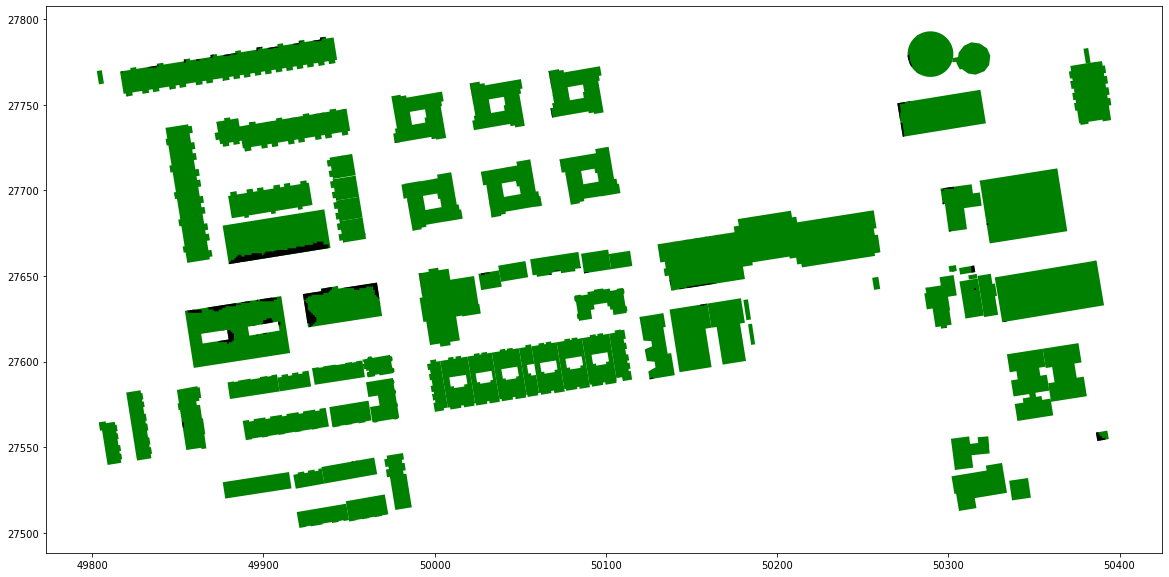

In [171]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(20,20))
show.building_surface.plot(ax=ax, color='g')
show.shadow.plot(ax=ax, color='black')

In [173]:
final.to_pickle('Tree_shadows_on_building_San_Francisco_RAW.pkl')